# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = study_results.merge(mouse_metadata, how = 'inner', on = 'Mouse ID')
# Display the data table for preview
mouse_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
mouse_study["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study['duplicate'] = mouse_study[['Mouse ID','Timepoint']].duplicated()
repeated_mouse = mouse_study.loc[mouse_study["duplicate"]==True].drop(['duplicate'], axis = 1)
repeated_mouse["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study['duplicate'] = mouse_study[['Mouse ID']].duplicated()
duplicate_mice = mouse_study.loc[mouse_study["duplicate"]==True].drop(['duplicate'], axis = 1)
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mice = mouse_study.drop_duplicates(["Mouse ID"]).reset_index().drop(['index'], axis = 1)
cleaned_mice_df = cleaned_mice.loc[cleaned_mice['Mouse ID']!='g989']
cleaned_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),duplicate
0,b128,0,45.0,0,Capomulin,Female,9,22,False
1,f932,0,45.0,0,Ketapril,Male,15,29,False
2,g107,0,45.0,0,Ketapril,Female,2,29,False
3,a457,0,45.0,0,Ketapril,Female,11,30,False
4,c819,0,45.0,0,Ketapril,Male,21,25,False
...,...,...,...,...,...,...,...,...,...
244,t565,0,45.0,0,Capomulin,Female,20,17,False
245,i557,0,45.0,0,Capomulin,Female,1,24,False
246,m957,0,45.0,0,Capomulin,Female,3,19,False
247,f966,0,45.0,0,Capomulin,Male,16,17,False


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


mouse_study.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].mean()
mouse_study.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].median()
mouse_study.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].var()
mouse_study.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].std()
mouse_study.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].sem()
tumor_summary = pd.DataFrame({
    "mean Tumor Volume":mouse_study.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].mean(),
    "median Tumor Volume":mouse_study.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].median(),
    "var Tumor Volume": mouse_study.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].var(),
    "std Tumor Volume": mouse_study.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].std(),
    "sem Tumor Volume": mouse_study.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].sem()
})
tumor_summary

,mean Tumor Volume,median Tumor Volume,var Tumor Volume,std Tumor Volume,sem Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

mouse_study.groupby('Drug Regimen').agg({
    "Tumor Volume (mm3)":["mean","median","var","std","sem"]
})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
timepoint_by_drug = mouse_study.groupby(["Drug Regimen"])["Timepoint"].count().sort_values(ascending = False)
drugs = mouse_study["Drug Regimen"].unique()
timepoints_df = pd.DataFrame({'Drug Regimen':drugs, "Number of Mice Tested":timepoint_by_drug})

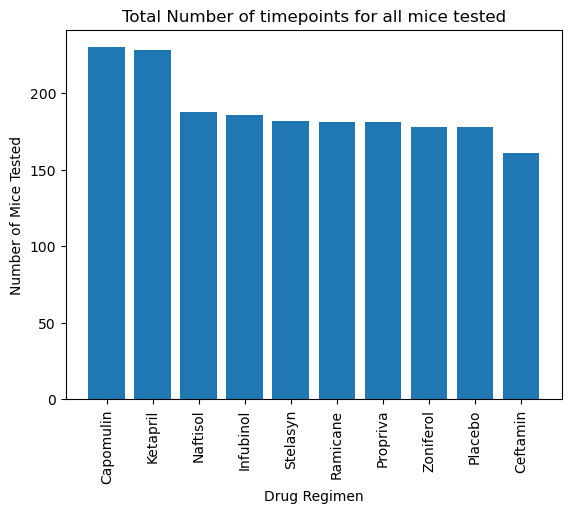

<Figure size 100x200 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

fig, timepoint = plt.subplots()
timepoint.bar(drugs,timepoint_by_drug)
timepoint.set_ylabel("Number of Mice Tested")
timepoint.set_xlabel("Drug Regimen")
timepoint.set_title("Total Number of timepoints for all mice tested")
plt.xticks(drugs, rotation=90)
plt.figure(figsize = (1, 2))
plt.show()

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

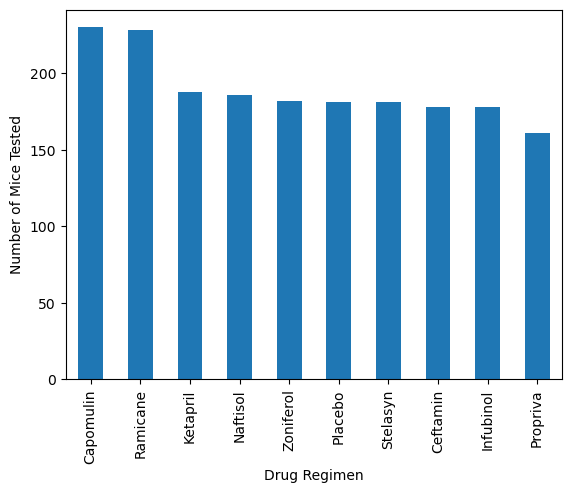

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

timepoints_df.plot(kind = 'bar',legend = False, ylabel = "Number of Mice Tested")

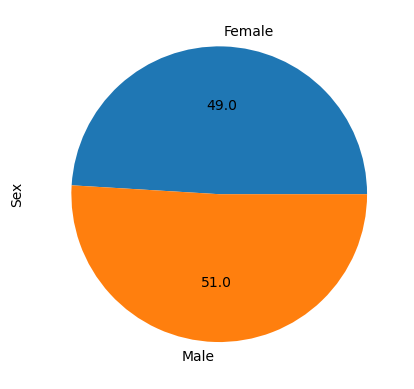

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice = mouse_study.loc[mouse_study['Mouse ID']!='g989']
mice_sex= mice.groupby(["Sex"])['Mouse ID'].count()
mice_sex_df = pd.DataFrame(mice_sex)

# Create the Pie chart
mice_sex.plot(kind = 'pie',ylabel= "Sex", autopct='%.1f')
plt.show()

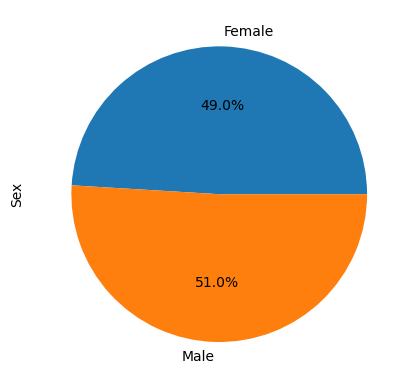

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels= mice_sex_df.reset_index()['Sex']

# Create the pie chart
plt.axes().set_ylabel('Sex')
plt.pie(mice_sex,labels = labels, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
lasttime = mouse_study.drop_duplicates(["Mouse ID"],keep="last")[['Mouse ID','Tumor Volume (mm3)']].reset_index().drop(['index'], axis = 1)
lasttime.rename(columns = {"Tumor Volume (mm3)":'Final Tumor Volume (mm3)'}, inplace = True)
lasttime

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
boxplot = lasttime.merge(cleaned_mice_df)
boxplot

,Mouse ID,Final Tumor Volume (mm3),Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),duplicate
0,b128,38.982878,0,45.0,0,Capomulin,Female,9,22,False
1,f932,45.000000,0,45.0,0,Ketapril,Male,15,29,False
2,g107,71.905117,0,45.0,0,Ketapril,Female,2,29,False
3,a457,49.783419,0,45.0,0,Ketapril,Female,11,30,False
4,c819,62.175705,0,45.0,0,Ketapril,Male,21,25,False
...,...,...,...,...,...,...,...,...,...,...
243,t565,34.455298,0,45.0,0,Capomulin,Female,20,17,False
244,i557,47.685963,0,45.0,0,Capomulin,Female,1,24,False
245,m957,33.329098,0,45.0,0,Capomulin,Female,3,19,False
246,f966,30.485985,0,45.0,0,Capomulin,Male,16,17,False


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
# The lists has for independing lists inbedded, one for each treatment
drug_regimen = []

# Append list of the Final Tumour Volume to the drug_regimen list
for drug in treatments:
    drug_regimen.append(boxplot['Final Tumor Volume (mm3)'].loc[boxplot['Drug Regimen']==drug].tolist())

    
drug_regimen_df = pd.DataFrame(drug_regimen)

# Flip the dataframe to have the data organised by drug
drug_regimen_df = drug_regimen_df.T
# Name the columns
drug_regimen_df.columns=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


#create a empty dictionary to fill with the quartiles of all the different treatments
quatiles = {}

for drug in treatments:
    quatiles[f'{drug}'] = drug_regimen_df[drug].quantile([.25,.5,.75])  

In [16]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

outliers = {}

# Run a for loop to look throught the different quartiles and determine iqr 
for drug in treatments:
    #calculate the lower quantile and upper quantile
    lowerq = quatiles[drug][0.25]
    upperq = quatiles[drug][0.75]
    iqr = upperq-lowerq

    #Print the lower quartile and upper quartiles
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quatiles[drug][0.5]} ")
    
    # Find the lower and upper bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    #Print the lower and upper bounds
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(f"---------------------------------------------")
    
    
    #Create a list of the outliers and add them to the dictionary
    outliers[f'{drug}'] = []
    for i, value in drug_regimen_df[drug].iteritems():

        # Use conditionals to determine if a value is smaller or larger than the lower and upper bounds
        if(value > upper_bound or value < lower_bound): 
            print(value)
            outliers[f'{drug}'].append(value)
    print(outliers[f'{drug}'])

# Print the outliers
print(f'The outlier for each drug are {outliers}')

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
---------------------------------------------
[]
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
---------------------------------------------
[]
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
------------------

Text(0, 0.5, 'Final Tumor Volume (mm3)')

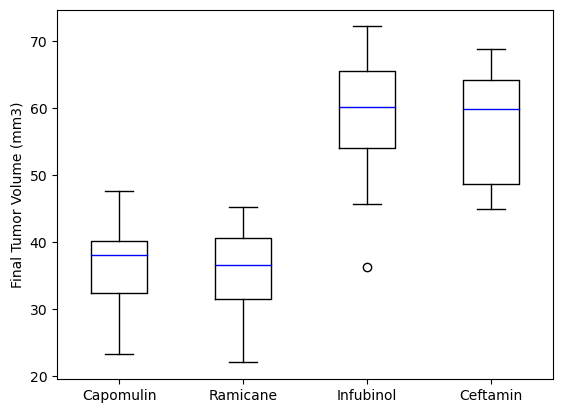

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_ = drug_regimen_df.boxplot(grid = False, color=dict(boxes ='k', whiskers='k', medians='b', caps='k',))
boxplot_.set_ylabel('Final Tumor Volume (mm3)')

## Line and Scatter Plots

<AxesSubplot:title={'center':'Capomulin treatmetn of mouse l509'}, xlabel='Timepoint (days)', ylabel='Tumor Volume (mm3)'>

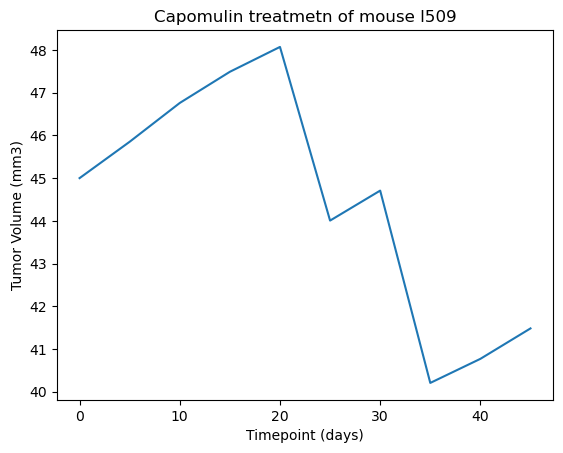

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_timepoint_mouse_l509 = mouse_study.loc[mouse_study['Mouse ID']=='l509']
capomulin_timepoint_mouse_l509 = capomulin_timepoint_mouse_l509.groupby(['Timepoint'])['Tumor Volume (mm3)'].mean()
capomulin_timepoint_mouse_l509.plot.line(ylabel='Tumor Volume (mm3)',title='Capomulin treatmetn of mouse l509', xlabel='Timepoint (days)')

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin = mouse_study.loc[mouse_study['Drug Regimen']=='Capomulin']
capomulin_mouse_weight = capomulin.groupby('Mouse ID').mean()


<AxesSubplot:xlabel='Weight (g)', ylabel='Average Tumor Volume (mm3)'>

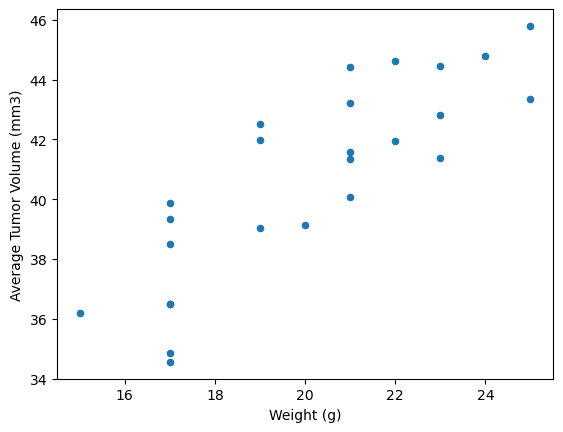

In [21]:
capomulin_mouse_weight.plot.scatter(x ='Weight (g)',y= 'Tumor Volume (mm3)',ylabel='Average Tumor Volume (mm3)')

## Correlation and Regression

The r-squared is: 0.84


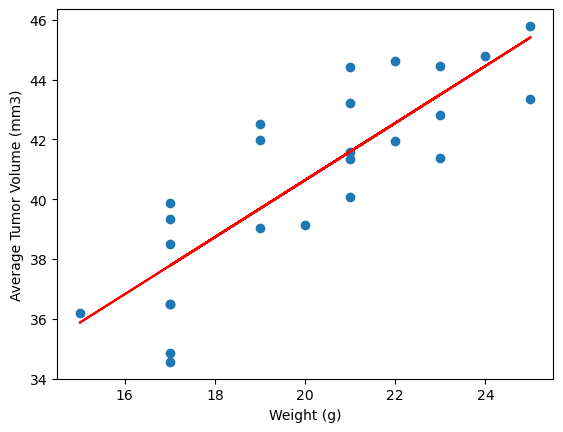

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

y_values = capomulin_mouse_weight['Tumor Volume (mm3)']
x_values = capomulin_mouse_weight['Weight (g)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The r-squared is: {round(rvalue,2)}")


plt.show()